<a href="https://colab.research.google.com/github/cinaral/saymyname/blob/master/week6_controlling_systems/30062020_week6_Controlling_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Controlling Systems

In this part, we will try to control the pendulum position of the 4th week with closed loop control system.

Open loop controlled systems are controlled manually which is not precise. On the other hand, close loop controlled systems are controlled with a controller desined for corresponding system which makes it precise.

![alt text](https://raw.githubusercontent.com/cinaral/saymyname/master/references/Matrix-transfer-function-feedback-system.jpg)

Closed loop control system has transfer function as;

\begin{equation*}
\frac{Output}{Input}=\frac{Y(s)}{X(s)}=\frac{G(s)}{1+G(s)H(s)}
\end{equation*}

where; G(s) is direct transfer function, and H(s) is feedback transfer function.

Let us have the forced pendulum equation of motion as;

\begin{align}
\ddot{\theta} + \frac{b}{m}\dot{\theta} + \frac{g}{l}{\theta}= \frac{F(t)}{m}
\end{align}

Taking Laplace transform of the equation of motion will give the closed loop transfer function as;

\begin{align}
\frac{\theta(s)}{F(s)} = \frac{1}{s^2-s{\theta(0)}-\dot{\theta(0)}+\frac{b}{m}s-\frac{b}{m}{\theta(0)}+\frac{g}{l}}
\end{align}

However, the transfer function approach is acceptable if there are zero initial conditions. Then our transfer function becames;

\begin{align}
\frac{\theta(s)}{F(s)} = \frac{1}{s^2+\frac{b}{m}s+\frac{g}{l}}
\end{align}

Here, F(s) is input and θ(s) is output. We can do some rearragements in order to obtain expressions for G(s) and H(s).

\begin{align}
\frac{\theta(s)}{F(s)} = \frac{1}{s^2+\frac{b}{m}s+\frac{g}{l}}
\end{align}

\begin{align}
{F(s)} = {\theta(s)}({s^2+\frac{b}{m}s+\frac{g}{l}})
\end{align}

\begin{align}
{F(s)}-\frac{g}{l}{\theta(s)} = {\theta(s)}({s^2+\frac{b}{m}s})
\end{align}

which means that;

\begin{align}
{G(s)} = \frac{1}{s^2+\frac{b}{m}s}
\end{align}

\begin{align}
{H(s)} = \frac{g}{l}
\end{align}

Also, we can get the controller of the system, K(s);

\begin{align}
{G(s)} = K(s)g(s)
\end{align}

\begin{align}
{G(s)} = \frac{1}{s}\frac{1}{s+\frac{b}{m}}
\end{align}

\begin{align}
{K(s)} = \frac{1}{s}
\end{align}

which is integral controller so the pendulum system is controlled with integral controller.

By controlling, we actually try to reach stability. Stability can be happen by reaching minimum points where particals stays stable, or reaching desired value or point or position. Also, reaching desired plot can be thought as reaching stability. Then, we can try reaching stability in a shortest time. It will happen when the system critically damped.

Here, we can try to reach stable point where pendulum stops in a shortest time.

\begin{align}
\frac{\theta(s)}{F(s)} = \frac{1}{s^2+2{\zeta}{w_n}s+{w_n}^2}
\end{align}

\begin{align}
{w_n}^2 = \frac{g}{l}
\end{align}

\begin{align}
2{\zeta}{w_n} = \frac{b}{m}
\end{align}

For critically damping;

\begin{align}
{\zeta} = 0.707
\end{align}

We can try to reach this value by changing the length of pendulum, the mass, and the damper with a proper damping coefficient if possible. However, in real world, this is not possible most of the time.That is the reason why we use controller. We can change the controller gain or coefficient which is 1 for integral controller 1/s in here without changing given length, mass, or damper.

We will reach the stable point at minimum. We can change this point by rotating coordinate system then assigning new coordinate system so pendulum will reach stability at new point. Here, we just try to understand basics of the topic so we will use stable point at minimum. By minimum, we mean the minimum potential energy.

Let us try to find proper Ki for pendulum with given mass = 0.5 kg, damping coefficient = 0.5 Ns/m, g = 9.81 m/s², and l = 1 m.

Transfer function of the system is;

\begin{align}
\frac{\theta(s)}{F(s)} = \frac{K_il}{ls^2+\frac{b}{m}ls+{g}{K_i}}
\end{align}

Install and import necessary libraries;

In [173]:
!pip install control

import matplotlib
import ipywidgets
import plotly
import numpy as np
import math
import os
from IPython import *
import scipy

%matplotlib inline
from sympy import symbols
from sympy import simplify
from sympy.abc import s, t, a
from sympy.integrals import *
from sympy.plotting import *
from control import *
from control.matlab import *
import matplotlib.pyplot as plt
from sympy import Heaviside

import numpy as np 
from scipy.integrate import odeint
import scipy.integrate as integrate
import matplotlib.pyplot as plt 
import math
import matplotlib.animation as animation
from matplotlib import animation, rc
from IPython.display import HTML

Define transfer function;

In [174]:
theta_zero = 0
dtheta_dt_zero = 0
b = 0.5
g = 9.81
l = 1
m = 0.5
Ki = 0.035

num = [Ki*l]
denum = [l, l*(b/m), Ki*g]

tr = tf(num, denum)
print("Transfer Function is")
print(tr)

Transfer Function is

      0.035
----------------
s^2 + s + 0.3434



Impulse responce


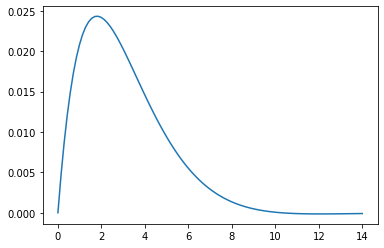

In [175]:
#impulse responce
print('Impulse responce')
plt.figure(2)
yout, T = impulse(tr)
plt.plot(T.T, yout.T)
plt.show(block=False)

Step response


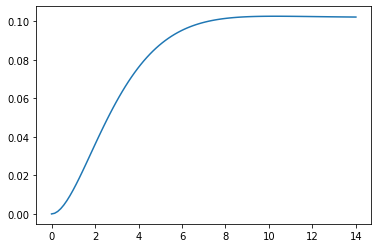

In [176]:
# Step response for the system
print('Step response')
plt.figure(1)
yout, T = step(tr)
plt.plot(T.T, yout.T)
plt.show(block=False)


For Ki = 0.035, we have critically damped system.

# Simulation of Closed Loop Controlled Pendulum with Integral controller.

Let us prepare pendulum simulation with above m, b, g, l, and Ki values with impulse force.

Define the differantial equation;

In [177]:
def mode1(theta,t,b,g,l,m,Ki):
	theta1 = theta[0]
	theta2 = theta[1]
	dtheta1_dt = theta2 
	dtheta2_dt = -(b/m)*theta2 - Ki*(g/l)*math.sin(theta1) + Ki*(f/m)
	dtheta_dt = [dtheta1_dt, dtheta2_dt]
	return dtheta_dt

Now initialize parameters m, g, b, l;

In [178]:
#damping coefficient
b=0.5

#accelaration due to gravity
g=9.81

#lenght of string
l=1

#mass of bob
m=0.5

#integrall controller gain
Ki = 0.035

Initial position of pendulum while animating, x and y coordinate. It is also initial condition. It means that particle is at rest at that position;

In [179]:
#initial condition
theta_0 = [1,0]

Define animation time;

In [180]:
#time points
t = np.linspace(0,30,150)

Let us define impulse force which is input;

In [181]:
for j in range(len(t)):
    if j==0:
        f = ((1/math.sqrt(math.pi*2*(0.01)**2))*math.e**((-0)**2/(2*(0.01)**2)))
    else:
        f = 0

Now, solve the differantial equation;

In [182]:
theta = odeint(mode1,theta_0,t,args = (b,g,l,m,Ki))

Let us plot the results first;

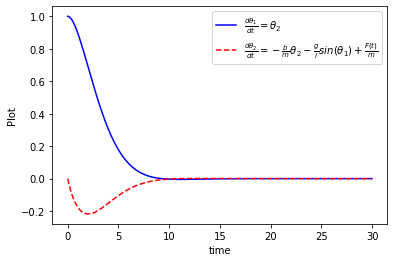

In [183]:
plt.figure()
plt.plot(t,theta[:,0],'b-',label = r'$\frac{d\theta_1}{dt}=\theta_2$')
plt.plot(t,theta[:,1],'r--',label = r'$\frac{d\theta_2}{dt}=-\frac{b}{m}\theta_2-\frac{g}{l}sin(\theta_1)+\frac{F(t)}{m}$')
plt.ylabel('Plot')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

Now, make the animation of the system;

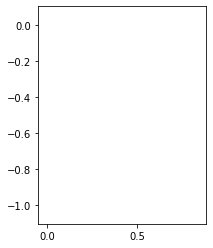

In [184]:
fig = plt.figure(figsize=(3, 4), facecolor='w')
ax = fig.add_subplot(1, 1, 1)
plt.rcParams['font.size'] = 15

lns = []
for i in range(len(theta)):

	#plotting the string/chord
    ln, = ax.plot([0, np.sin(theta[i, 0])], [0, -np.cos(theta[i, 0])], color='k', lw=2)

    #plotting the bob
    bob, = ax.plot(np.sin(theta[i, 0]), -np.cos(theta[i, 0]),'o',markersize=20,color='r')

    #plotting the time for simulation
    tm = ax.text(-0.9, 0.25, 'Time = %.1fs' % t[i])
    lns.append([ln, bob, tm])
    
ax.set_aspect('equal', 'datalim')
ani = animation.ArtistAnimation(fig, lns, interval=50)
rc('animation', html='jshtml')
ani

For Ki = 1, we have normal wellknown underdamped system like in the 4th week. For Ki = 0.035, we have critically damped system. Hence, by changing only controller gain, we can control the pendulum system without changing other properties of the system.

# PID Control of the same pendulum

Let's now use PID (Proportional Integral Derivative) controller.

K(s) for PID controller is;

\begin{align}
{K(s)} = K_p+K_ds+\frac{K_i}{s}
\end{align}

In time domain;

\begin{align}
{k(t)} = K_perror(t)+K_d\frac{derror(t)}{dt}+{K_i}{\int^t_0}{error(\tau)d{\tau}}
\end{align}

\begin{align}
{error(t)} = set point(SP) - processed value(PV)
\end{align}

Then the transfer function becomes;

\begin{align}
\frac{\theta(s)}{F(s)} = \frac{K_p+K_ds+\frac{K_i}{s}}{s^2+\frac{b}{m}s+\frac{g}{l}+K_p+K_ds+\frac{K_i}{s}}
\end{align}

Let us apply same process to find critically damping condition for proper Ki, Kp, Kd gain values.

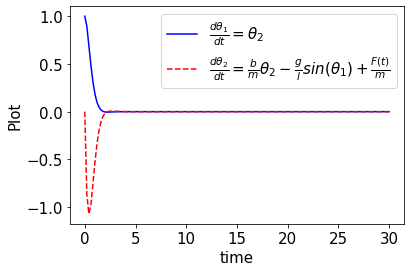

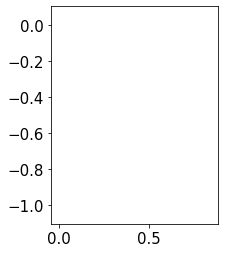

In [185]:
def mode1(theta,t,b,g,l,m,Ki,Kp,Kd):
	theta1 = theta[0]
	theta2 = theta[1]
	dtheta1_dt = theta2 
	dtheta2_dt = -((Kp*(g/l)+(b/m))/(1+(Kd/l)))*theta2 - ((Ki/l)/(1+(Kd/l)))*math.sin(theta1) + (Ki*(f/m))/(1+(Kd/l)) + ((Kp/m)/(1+(Kd/l)))*df + ((Kd/m)/(1+(Kd/l)))*ddf
	dtheta_dt = [dtheta1_dt, dtheta2_dt]
	return dtheta_dt

#damping coefficient
b=0.5

#accelaration due to gravity
g=9.81

#lenght of string
l=1

#mass of bob
m=0.5

#integrall controller gain
Ki = 10

#derivative controller gain
Kd = 0.2

#propotional controller gain
Kp = 0.5

#initial condition
theta_0 = [1,0]

#time points
t = np.linspace(0,30,150)

for j in range(len(t)):
    if j==0:
        f = ((1/math.sqrt(math.pi*2*(0.01)**2))*math.e**((-0)**2/(2*(0.01)**2)))
        df = (-(1/(2*(0.01)**2)))*((1/math.sqrt(math.pi*2*(0.01)**2))*math.e**((-0)**2/(2*(0.01)**2)))
        ddf = ((-(1/(2*(0.01)**2)))**2)*((1/math.sqrt(math.pi*2*(0.01)**2))*math.e**((-0)**2/(2*(0.01)**2)))
    else:
        f = 0
        df = 0
        ddf = 0

theta = odeint(mode1,theta_0,t,args = (b,g,l,m,Ki,Kp,Kd))

plt.figure()
plt.plot(t,theta[:,0],'b-',label = r'$\frac{d\theta_1}{dt}=\theta_2$')
plt.plot(t,theta[:,1],'r--',label = r'$\frac{d\theta_2}{dt}=\frac{b}{m}\theta_2-\frac{g}{l}sin(\theta_1)+\frac{F(t)}{m}$')
plt.ylabel('Plot')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

fig = plt.figure(figsize=(3, 4), facecolor='w')
ax = fig.add_subplot(1, 1, 1)
plt.rcParams['font.size'] = 15

lns = []
for i in range(len(theta)):

	#plotting the string/chord
    ln, = ax.plot([0, np.sin(theta[i, 0])], [0, -np.cos(theta[i, 0])], color='k', lw=2)

    #plotting the bob
    bob, = ax.plot(np.sin(theta[i, 0]), -np.cos(theta[i, 0]),'o',markersize=20,color='r')

    #plotting the time for simulation
    tm = ax.text(-0.9, 0.25, 'Time = %.1fs' % t[i])
    lns.append([ln, bob, tm])
    
ax.set_aspect('equal', 'datalim')
ani = animation.ArtistAnimation(fig, lns, interval=50)
rc('animation', html='jshtml')
ani


For Ki = 10, Kd = 0.2, and Kp = 0.5, we have critically damped system.

PID controlled system reaches stability faster than only Integral controlled system.



In both simulations, we can assume that controller is at fix point of pendulum.

We can say that these simulations are simplest visualization of robot arm.